# 군집화(Clustering) - K Means Algorithm

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

- Iris data를 차원축소

In [2]:
from sklearn.datasets import load_iris
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [3]:
iris = load_iris()
iris_std = StandardScaler().fit_transform(iris.data)

pca = PCA(n_components=2)
iris_pca = pca.fit_transform(iris_std)

In [4]:
df = pd.DataFrame(iris.data, columns=['sl','sw','pa','pw'])
df['PC1'] = iris_pca[:,0]
df['PC2'] = iris_pca[:,1]
df.head(3)

,sl,sw,pa,pw,PC1,PC2
0,5.1,3.5,1.4,0.2,-2.264703,0.480027
1,4.9,3.0,1.4,0.2,-2.080961,-0.674134
2,4.7,3.2,1.3,0.2,-2.364229,-0.341908


- K-Means 모델 생성/학습

In [5]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3, random_state=2021)

In [6]:
kmeans.fit(iris_std)

KMeans(n_clusters=3, random_state=2021)

In [7]:
kmeans.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 1,
       2, 2, 2, 2, 1, 2, 2, 2, 2, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 1, 1, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1,
       1, 1, 1, 2, 2, 1, 1, 1, 1, 2, 1, 2, 1, 2, 1, 1, 2, 1, 1, 1, 1, 1,
       1, 2, 2, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 2])

In [8]:
df['target'] = iris.target
df['cluster'] = kmeans.labels_
df.tail()

,sl,sw,pa,pw,PC1,PC2,target,cluster
145,6.7,3.0,5.2,2.3,1.870503,0.386966,2,1
146,6.3,2.5,5.0,1.9,1.564580,-0.896687,2,2
147,6.5,3.0,5.2,2.0,1.521170,0.269069,2,1
148,6.2,3.4,5.4,2.3,1.372788,1.011254,2,1
149,5.9,3.0,5.1,1.8,0.960656,-0.024332,2,2


In [9]:
df.groupby(['target','cluster']).count()

sl  sw  pa  pw  PC1  PC2
target cluster                          
0      0        50  50  50  50   50   50
1      1        11  11  11  11   11   11
       2        39  39  39  39   39   39
2      1        36  36  36  36   36   36
       2        14  14  14  14   14   14

- 데이터 시각화

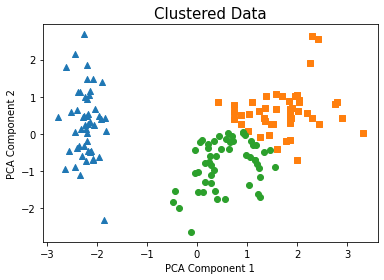

In [10]:
# 군집화한 결과를 차원축소하여 시각화
markers = ['^','s','o']

for i, marker in enumerate(markers):
    x_axis_data = df[df.cluster == i]['PC1']
    y_axis_data = df[df.cluster == i]['PC2']
    plt.scatter(x_axis_data, y_axis_data, marker=marker)
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('Clustered Data', fontsize=15)
plt.show()

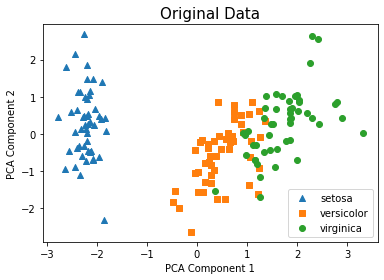

In [11]:
for i, marker in enumerate(markers):
    x_axis_data = df[df.target == i]['PC1']
    y_axis_data = df[df.target == i]['PC2']
    plt.scatter(x_axis_data, y_axis_data, marker=marker,
                label=iris.target_names[i])
plt.legend()
plt.title('Original Data', fontsize=15)
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.show()

- 두개의 그림 비교

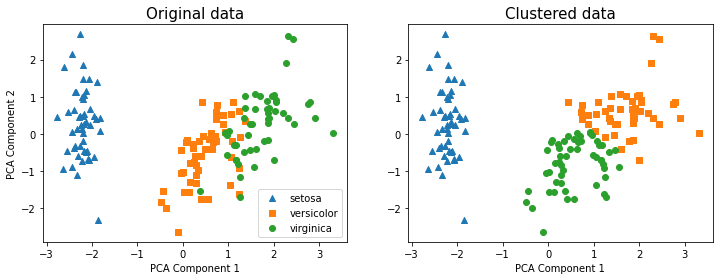

In [12]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12,4))
for k, column in enumerate(['target','cluster']):
    ax = axes[k]
    for i, marker in enumerate(markers):
        x_axis_data = df[df[column] == i]['PC1']
        y_axis_data = df[df[column] == i]['PC2']
        ax.scatter(x_axis_data, y_axis_data, marker=marker,label=iris.target_names[i])
        
        if k == 0:          # Original
            ax.set_title('Original data', fontsize=15)
            ax.set_ylabel('PCA Component 2')
            ax.legend()
        else:               # Cluster
            ax.set_title('Clustered data', fontsize=15)
        ax.set_xlabel('PCA Component 1')
plt.show()